## SPECIES CLASSIFIER MODEL RUN WITHOUT LAT LONG AND PH

In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('/Users/henrysun_1/Desktop/Duke/2024-2025/Summer 2024/fishics/data/ctd/2024-02_data_all_exo.csv')
df = df[df['station'] < 32] ## stations included in eDNA survey

data = pd.read_csv("/Users/henrysun_1/Desktop/Duke/2024-2025/Summer 2024/fishics/data/data_for_henry_2024.csv")
data = data[data['date'] == '2/1/24']

df = df.rename(columns={"GPS.Latitude..": "lat", "GPS.Longitude..": "long", "Depth.m":"depth","Sal.psu":"salt","Temp..C":"temp"})
df = df[['lat','long','depth','salt','station','temp','pH']]

# Group by station
grouped = df.groupby('station')

# Initialize lists to hold the aggregated data
stations = []
surface_temps = []
surface_salts = []
surface_pHs = []
bottom_temps = []
bottom_salts = []
bottom_pHs = []
latitudes = []
longitudes = []

# Iterate over each group
for station, group in grouped:
    # Find the row with the minimum depth (surface)
    min_depth_row = group.loc[group['depth'].idxmin()]
    # Find the row with the maximum depth (bottom)
    max_depth_row = group.loc[group['depth'].idxmax()]
    
    # Append the results to the lists. Took out lat/long/pH for this
    stations.append(station)
    surface_temps.append(min_depth_row['temp'])
    surface_salts.append(min_depth_row['salt'])
    # surface_pHs.append(min_depth_row['pH'])
    bottom_temps.append(max_depth_row['temp'])
    bottom_salts.append(max_depth_row['salt'])
    # bottom_pHs.append(max_depth_row['pH'])
    # latitudes.append(min_depth_row['lat'])  # assuming latitude is constant for each station
    # longitudes.append(min_depth_row['long'])  # assuming longitude is constant for each station

aggregated_df = pd.DataFrame({
    'station': stations,
    # 'latitude': latitudes,
    # 'longitude': longitudes,
    'surface_temp': surface_temps,
    'surface_salt': surface_salts,
    # 'surface_pH': surface_pHs,
    'bottom_temp': bottom_temps,
    'bottom_salt': bottom_salts,
    # 'bottom_pH': bottom_pHs
})

# Perform an inner join on the 'station' column
merged_df = data.merge(aggregated_df, on='station', how='inner')
fish_asvs = merged_df.iloc[:,11:86]
merged_df
ml_df2 = merged_df.iloc[:,11:] # type: ignore
# ml_df2 = ml_df2.drop(columns = ['tSNE1', 'tSNE2'])
ml_df2


,Atl_croaker_(nibea98),Bay_anchovy,Black_drum_or_Spot,Black_sea_bass,Brd_striped_anchovy,Little_tunny_or_skipjack_tuna,Nor_sea_robin,Scup,Smallmouth_flounder,Southern_kingfish(nibea95),...,Catfish_sp,White_perch,Whitefish_Cor,Pac_sand_lance,White_catfish,Atl_salmon,surface_temp,surface_salt,bottom_temp,bottom_salt
0,0.000000,0.240067,0.008431,0.000000,0.000000,0.0,0.005233,0.002279,0.006085,0.003435,...,0.0,0.0,0.0,0.0,0.0,0.0,7.207000,19.924286,6.984000,22.357692
1,0.000000,0.010920,0.000726,0.000065,0.000000,0.0,0.000610,0.000182,0.031328,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,7.572200,0.060000,7.327800,0.037500
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.028369,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,7.175250,18.300000,7.034833,22.330000
3,0.000000,0.075304,0.000000,0.000000,0.000000,0.0,0.000000,0.016420,0.017985,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,7.141714,0.008571,6.951571,0.066429
4,0.000000,0.158802,0.000000,0.000000,0.000000,0.0,0.044081,0.014342,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,7.747545,21.470000,7.162100,22.380000
5,0.000000,0.013282,0.025096,0.000000,0.000000,0.0,0.008265,0.000000,0.015334,0.004269,...,0.0,0.0,0.0,0.0,0.0,0.0,7.412000,22.007000,7.383020,22.400000
6,0.000000,0.008921,0.006158,0.000000,0.000000,0.0,0.018742,0.000000,0.036051,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,5.550700,0.083000,5.717857,0.105000
7,0.015507,0.038603,0.004211,0.000465,0.000000,0.0,0.001601,0.000000,0.036010,0.000402,...,0.0,0.0,0.0,0.0,0.0,0.0,4.890875,19.000000,5.516107,20.027500
8,0.006269,0.051945,0.006176,0.000364,0.000000,0.0,0.000168,0.000000,0.033119,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,6.065100,18.135000,6.225100,21.723000
9,0.008507,0.069150,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.047961,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,6.678375,22.031250,6.654333,22.150000


In [7]:

from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
import numpy as np

## MULTI OUTPUT CLASSIFIER
import warnings
warnings.filterwarnings("ignore")

# Select features (oceanographic variables) and labels (presence/absence of multiple species)
features = ml_df2[['surface_temp', 'surface_salt', 'bottom_temp', 'bottom_salt']]
labels = ml_df2.loc[:, 'Atl_croaker_(nibea98)':'Atl_salmon'].applymap(lambda x: 1 if x > 0 else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize and train the multi-output Random Forest classifier
rf_classifier = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

accuracies = []
precisions = []
recalls = []
f1_scores = []
for i, species in enumerate(labels.columns):
    accuracy = accuracy_score(y_test.iloc[:, i], y_pred[:, i])
    # precision = precision_score(y_test.iloc[:, i], y_pred[:, i])
    # recall = recall_score(y_test.iloc[:, i], y_pred[:, i])
    # f1 = f1_score(y_test.iloc[:, i], y_pred[:, i])
    
    accuracies.append(accuracy)
    # precisions.append(precision)
    # recalls.append(recall)
    # f1_scores.append(f1)

    print(f"Classification report for {species}:\n", classification_report(y_test.iloc[:, i], y_pred[:, i]))
    # print(f"Accuracy for {species}: {accuracy}")

# Calculate overall average accuracy across all species
average_accuracy = np.mean(accuracies)
average_accuracy

# # Evaluate the model
# for i, species in enumerate(labels.columns):
#     print(f"Classification report for {species}:\n", classification_report(y_test.iloc[:, i], y_pred[:, i]))


Classification report for Atl_croaker_(nibea98):
               precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5

Classification report for Bay_anchovy:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

Classification report for Black_drum_or_Spot:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.40      0.57         5

    accuracy                           0.40         5
   macro avg       0.50      0.20      0.29  

0.8613333333333333

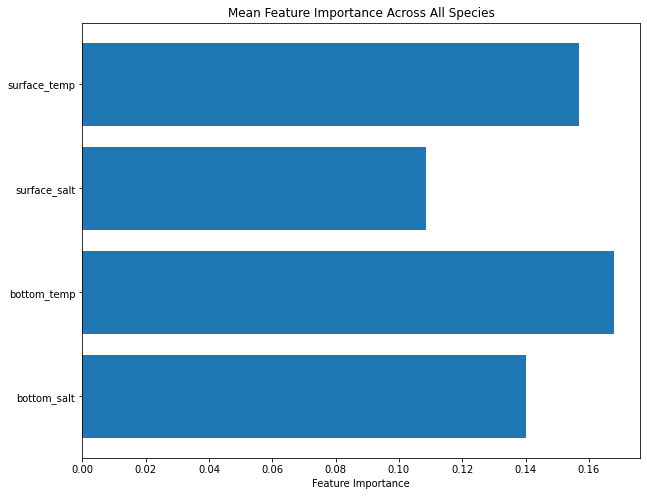

In [9]:
import matplotlib.pyplot as plt 

feature_importance_df = pd.DataFrame() # type: ignore
for i, species in enumerate(labels.columns):
    importances = rf_classifier.estimators_[i].feature_importances_
    feature_importance_df[species] = importances

# Calculate mean feature importance across all species
feature_importance_df['mean_importance'] = feature_importance_df.mean(axis=1)

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(features.columns, feature_importance_df['mean_importance'])
plt.xlabel('Feature Importance')
plt.title('Mean Feature Importance Across All Species')
plt.gca().invert_yaxis()
plt.show()

## Figure out units and interpretation. Test different hyperparams to maximize interpretability + accuracy
